In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
X = pd.read_csv('Synthetic_Data_Water_Quality.csv')
X.head()

Colour (TCU)  Turbidity (NTU)    pH  Conductivity (uS/cm)  \
0          8.34             3.39  8.06                819.00   
1         14.45             3.36  8.28               1371.10   
2          3.87             4.23  6.86                202.75   
3         14.57             1.75  7.00                696.16   
4          9.01             2.20  6.73                129.24   

   Total Dissolved Solids (mg/l)  Total Hardness (mg/l as CaCO3)  \
0                         787.15                          279.89   
1                         779.66                          112.04   
2                         485.10                          113.17   
3                         409.71                          140.39   
4                         343.55                            6.52   

   Aluminium (mg/l)  Chloride (mg/l)  Total Iron (mg/l)  Sodium (mg/l)  \
0              0.09           129.30               0.22          13.13   
1              0.20           163.73               0.13         127.48   
2              0.15            66.68               0.29         142.97   
3              0.06           102.42               0.15         194.07   
4              0.07           140.47               0.28           3.77   

   Sulphate (mg/l)  Zinc (mg/l)  Magnesium (mg/l)  Calcium (mg/l)  \
0            81.01         2.24             12.69          107.95   
1           307.99         4.05             52.01          107.12   
2            16.70         0.86             88.47          127.47   
3           393.09         2.60             61.36           99.16   
4           170.65         0.04             47.22          107.17   

   Potassium (mg/l)  Nitrate (mg/l)  Phosphate (mg/l) Potability  
0             17.50           22.23              0.41    potable  
1             45.28           16.06              0.68    potable  
2              4.90           19.81              0.91    potable  
3             36.73           42.82              0.02    potable  
4             44.79           14.35              2.08    potable

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Colour (TCU)                    10000 non-null  float64
 1   Turbidity (NTU)                 10000 non-null  float64
 2   pH                              10000 non-null  float64
 3   Conductivity (uS/cm)            10000 non-null  float64
 4   Total Dissolved Solids (mg/l)   10000 non-null  float64
 5   Total Hardness (mg/l as CaCO3)  10000 non-null  float64
 6   Aluminium (mg/l)                10000 non-null  float64
 7   Chloride (mg/l)                 10000 non-null  float64
 8   Total Iron (mg/l)               10000 non-null  float64
 9   Sodium (mg/l)                   10000 non-null  float64
 10  Sulphate (mg/l)                 10000 non-null  float64
 11  Zinc (mg/l)                     10000 non-null  float64
 12  Magnesium (mg/l)                1

In [4]:
X.isnull().sum()

Colour (TCU)                      0
Turbidity (NTU)                   0
pH                                0
Conductivity (uS/cm)              0
Total Dissolved Solids (mg/l)     0
Total Hardness (mg/l as CaCO3)    0
Aluminium (mg/l)                  0
Chloride (mg/l)                   0
Total Iron (mg/l)                 0
Sodium (mg/l)                     0
Sulphate (mg/l)                   0
Zinc (mg/l)                       0
Magnesium (mg/l)                  0
Calcium (mg/l)                    0
Potassium (mg/l)                  0
Nitrate (mg/l)                    0
Phosphate (mg/l)                  0
Potability                        0
dtype: int64

In [5]:
X.columns

Index(['Colour (TCU)', 'Turbidity (NTU)', 'pH', 'Conductivity (uS/cm)',
       'Total Dissolved Solids (mg/l)', 'Total Hardness (mg/l as CaCO3)',
       'Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)',
       'Sodium (mg/l)', 'Sulphate (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)',
       'Calcium (mg/l)', 'Potassium (mg/l)', 'Nitrate (mg/l)',
       'Phosphate (mg/l)', 'Potability'],
      dtype='object')

In [6]:
# I will rename columns so it will be smaller and easier
df = X.rename(columns = {
    'Colour (TCU)' : 'Colour' ,'Turbidity (NTU)' : 'Turbidity' , 'Conductivity (uS/cm)' : 'Conductivity' ,
    'Total Dissolved Solids (mg/l)' : 'TDS' ,'Total Hardness (mg/l as CaCO3)' : 'TH' ,'Aluminium (mg/l)' : 'Aluminium' ,
    'Chloride (mg/l)' : 'Chloride' ,'Total Iron (mg/l)' : 'TI' ,'Sodium (mg/l)' : 'Sodium' ,
    'Sulphate (mg/l)' : 'Sulphate' ,'Zinc (mg/l)' : 'Zinc' ,'Magnesium (mg/l)' : 'Magnesium' , 'Calcium (mg/l)' : 'Calcium' ,
    'Potassium (mg/l)' : 'Potassium' ,'Nitrate (mg/l)' : 'Nitrate' , 'Phosphate (mg/l)' : 'Phosphate'
})
df.head()

Colour  Turbidity    pH  Conductivity     TDS      TH  Aluminium  Chloride  \
0    8.34       3.39  8.06        819.00  787.15  279.89       0.09    129.30   
1   14.45       3.36  8.28       1371.10  779.66  112.04       0.20    163.73   
2    3.87       4.23  6.86        202.75  485.10  113.17       0.15     66.68   
3   14.57       1.75  7.00        696.16  409.71  140.39       0.06    102.42   
4    9.01       2.20  6.73        129.24  343.55    6.52       0.07    140.47   

     TI  Sodium  Sulphate  Zinc  Magnesium  Calcium  Potassium  Nitrate  \
0  0.22   13.13     81.01  2.24      12.69   107.95      17.50    22.23   
1  0.13  127.48    307.99  4.05      52.01   107.12      45.28    16.06   
2  0.29  142.97     16.70  0.86      88.47   127.47       4.90    19.81   
3  0.15  194.07    393.09  2.60      61.36    99.16      36.73    42.82   
4  0.28    3.77    170.65  0.04      47.22   107.17      44.79    14.35   

   Phosphate Potability  
0       0.41    potable  
1       0.68    potable  
2       0.91    potable  
3       0.02    potable  
4       2.08    potable

In [7]:
#Time to encode the label data
from sklearn.preprocessing import OneHotEncoder
Potability = np.array(df['Potability']).reshape(-1,1)
OH = OneHotEncoder(drop='first')
Potability_encoded = OH.fit_transform(Potability)

df['Potability_encoded'] = Potability_encoded.toarray()

In [8]:
df_encoded = df.copy()
df_encoded.drop(columns='Potability',inplace=True)
df_encoded.head()

Colour  Turbidity    pH  Conductivity     TDS      TH  Aluminium  Chloride  \
0    8.34       3.39  8.06        819.00  787.15  279.89       0.09    129.30   
1   14.45       3.36  8.28       1371.10  779.66  112.04       0.20    163.73   
2    3.87       4.23  6.86        202.75  485.10  113.17       0.15     66.68   
3   14.57       1.75  7.00        696.16  409.71  140.39       0.06    102.42   
4    9.01       2.20  6.73        129.24  343.55    6.52       0.07    140.47   

     TI  Sodium  Sulphate  Zinc  Magnesium  Calcium  Potassium  Nitrate  \
0  0.22   13.13     81.01  2.24      12.69   107.95      17.50    22.23   
1  0.13  127.48    307.99  4.05      52.01   107.12      45.28    16.06   
2  0.29  142.97     16.70  0.86      88.47   127.47       4.90    19.81   
3  0.15  194.07    393.09  2.60      61.36    99.16      36.73    42.82   
4  0.28    3.77    170.65  0.04      47.22   107.17      44.79    14.35   

   Phosphate  Potability_encoded  
0       0.41                 1.0  
1       0.68                 1.0  
2       0.91                 1.0  
3       0.02                 1.0  
4       2.08                 1.0

In [9]:
px.scatter_matrix(df_encoded,width=1000,height=1000,color="Potability_encoded")

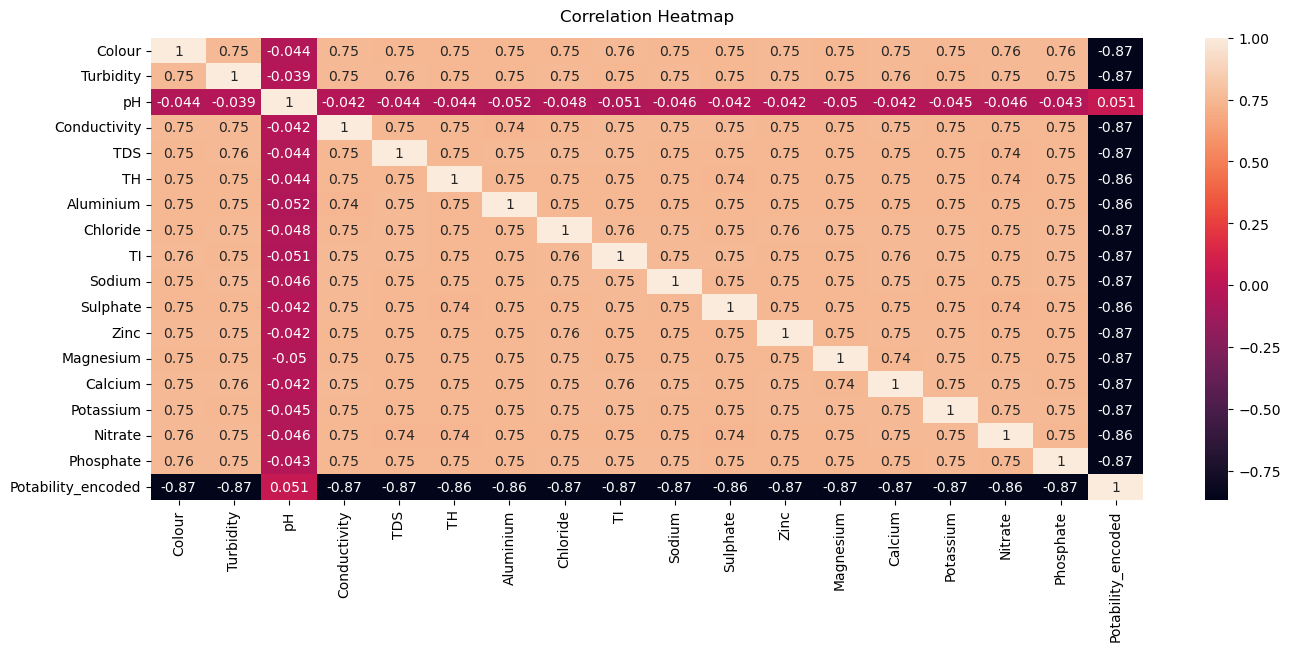

In [10]:
plt.figure(figsize=(16, 6))
fig = sns.heatmap(data=df_encoded.corr(),annot=True)
fig.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [11]:
X = df_encoded.drop(columns='Potability_encoded')
y = df_encoded['Potability_encoded']

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
print('Shape of features data in training is : ',X_train.shape)
print('Shape of features data in testing is : ',X_test.shape)
print('Shape of target data in training is : ',y_train.shape)
print('Shape of target data in testing is : ',y_test.shape)


Shape of features data in training is :  (7000, 17)
Shape of features data in testing is :  (3000, 17)
Shape of target data in training is :  (7000,)
Shape of target data in testing is :  (3000,)


In [13]:
# time to Standardize the data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)


In [14]:
# Now I will try different model to get the best score
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [15]:
import warnings
warnings.filterwarnings('ignore')

models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [16]:
print(finalResults)

[('LR', 1.0), ('SVC', 1.0), ('KNN', 1.0), ('DTC', 1.0), ('GNB', 1.0), ('SGDC', 1.0), ('Perc', 1.0), ('NC', 1.0), ('Ridge', 1.0), ('NuSVC', 1.0), ('BNB', 1.0), ('RF', 1.0), ('ADA', 1.0), ('XGB', 1.0), ('PAC', 1.0)]
